# Demo for generating complete LUTs from partial input



In [1]:
from cana.datasets.bio import PARTIAL_LUTS_DEMO
from cana.drawing.schema_vis import plot_schemata
from cana.drawing.plot_look_up_table import plot_look_up_table
from cana.utils import fill_out_lut

from cana.boolean_node import BooleanNode

## Partial LUTs

These are incomplete effective graphs with '-' signifying the wildcard symbol. Visually inspecting an effective graph doesn't allow us to infer its status of completeness or identify any inherent contradictions within the inputs.

The fill_out_lut() function enables us to check for contradictory output data. The contradictory outputs are marked by '!'

The fill_out_lut() function also checks for missing rules in the LUT, allowing us to correct out data infered from sources and explore state spaces yet to be understood.  These outputs are marked by '?'.

In [2]:
# Using the fill_out_lut function found in utils.py

partial_luts = [
    [("00--", "0"), ("1--1", "1"), ("11--", "1")],
    [("1--", "1"), ("101", "0"), ("011", "0"), ("01-", "1")],
    [("0--0", "0"), ("1--1", "0"), ("0111", "1"), ("0011", "1")],
]
generated_lut = fill_out_lut(partial_luts[1])
generated_lut

Clashing output values for entry: 101
Clashing output values for entry: 011


[('000', '?'),
 ('001', '?'),
 ('010', '1'),
 ('011', '!'),
 ('100', '1'),
 ('101', '!'),
 ('110', '1'),
 ('111', '1')]

## Partial LUTs in BNS (.cnet) format

BNS is a software tool for computing attractors in Boolean Networks with Synchronous update. Synchronous Boolean networks are used for the modeling of genetic regulatory networks.

BNS reads in a Boolean network description represented in a .cnet format similar to the Berkeley Logic Interchange Format (BLIF) format commonly used in synthesis and verification tools and prints out the set of network's attractors.

Check: <https://people.kth.se/~dubrova/bns.html>

Entry clash in node  5  for  {'000'}  i.e. State number:  0
<BNode(id=5, name='Six', k=2, inputs=[0,1], state='0', outputs=[0,1,?,1] constant=False)>
  In: Out:
0  00    0
1  01    1
2  10    ?
3  11    1
Error (schemata_look_up_table): The outputs contain missing values. Please fill the missing values before generating the schemata look-up table.
False


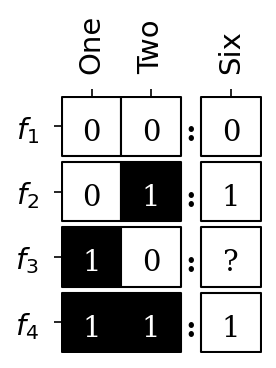

Error (plot_schemata()): The output contains '?'


False

In [3]:
partial_luts = (
    PARTIAL_LUTS_DEMO()
)  # Instantiating a sample partial_luts dataset from the dataset folder.

node = partial_luts.nodes[5]

print(node)
print(node.look_up_table())
print(node.schemata_look_up_table()) # This will throw an error as the presence of '?' makes it impossible to generate a schemata look up table.

plot_look_up_table(node)
plot_schemata(node) # This will throw an error as the presence of '?' makes it impossible to generate a schemata look up table.

In [4]:
node.bias()

0.5

## Instantiating a BooleanNode object using partial LUT

Incorporating the fill_out_lut() function into the instantiation of a single boolean node object under the class BooleanNode, this object will now contain '?' for unspecified output values in the LUT entry. 


<BNode(id=0, name='x', k=4, inputs=[1,2,3,4], state='0', outputs=[?,?,?,?...?,1,0,0] constant=False)>


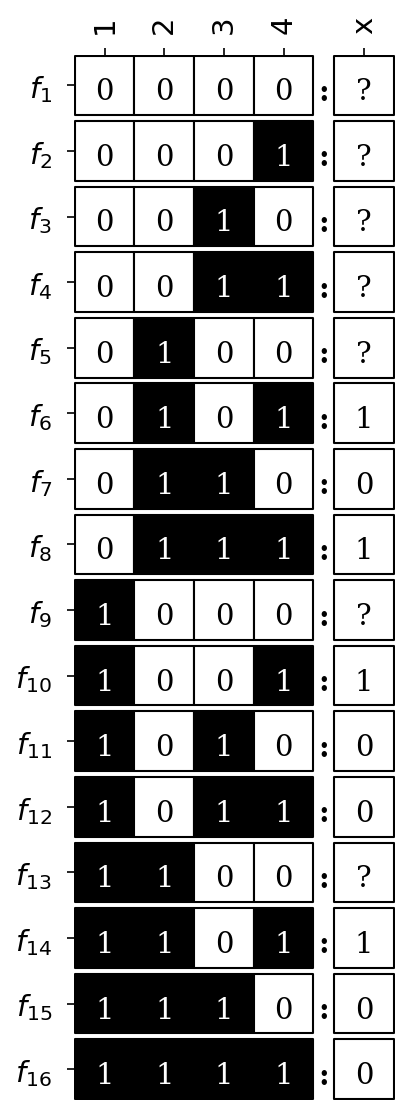

Error (plot_schemata()): The output contains '?'


False

In [5]:
partial_luts = [
    [("00--", "0"), ("1--1", "1"), ("11--", "1")],
    [("1--", "1"), ("101", "0"), ("011", "0"), ("01-", "1")],
    [("0--0", "0"), ("1--1", "0"), ("0111", "1"), ("0011", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "0"), ("01-1", "1")],
    
]
partial_lut = partial_luts[3]

"""
generated_lut = fill_out_lut(partial_lut) # Using the fill_out_lut function found in utils.py
output_list = [x[1] for x in generated_lut] # Extracting the output values from the generated_lut
print(output_list)
generated_node = BooleanNode.from_output_list(output_list) # Instantiating a BooleanNode object from the output_list
generated_node.look_up_table() # Displaying the look-up table of the generated_node
"""

# Combining the above functions into a single function under BooleanNode class
generated_node = BooleanNode.from_partial_lut(partial_lut) 
print(generated_node)
# print(generated_node.outputs)
plot_look_up_table(generated_node)
plot_schemata(generated_node) # This will throw an error as the presence of '?' makes it impossible to generate a schemata look up table.

## Generating LUT with specified Node Bias

The BooleanNode object calculates the node bias using the .bias() function. 

```python
generated_node.bias()
```


Generated the node with a bias of 0.5. This is the closest bias less than or equal to the required bias of 0.5.
<BNode(id=0, name='x', k=4, inputs=[1,2,3,4], state='0', outputs=[1,1,0,0...1,1,0,0] constant=False)>


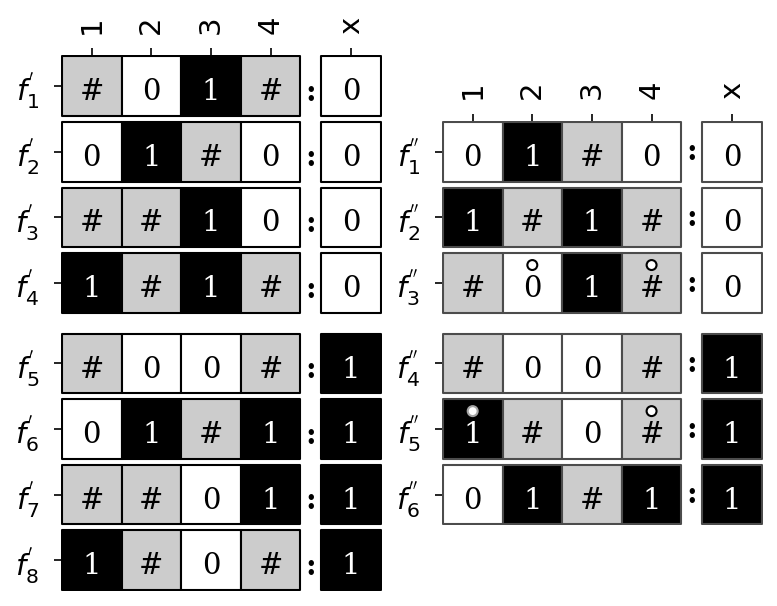

In [6]:
partial_luts = [
    [("00--", "0"), ("1--1", "1"), ("11--", "1")],
    [("1--", "1"), ("101", "0"), ("011", "0"), ("01-", "1")],
    [("0--0", "0"), ("1--1", "0"), ("0111", "1"), ("0011", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "0"), ("01-1", "1")],   
]
partial_lut = partial_luts[3]


# generating a node with a required bias


"""
# Fill missing output values with the specified bias or with specified effective connectivity or randomly
generated_node = BooleanNode.from_output_list(partial_lut)
required_node_bias = 0.5 # Required bias of the node
verbose = True # Set to True to display the steps of the function

if required_node_bias is not None: # If required node bias is specified, then fill missing output values with the specified bias.

    # Checking if required node bias is within the achievable bias range of the node.

    # Calculating max achievable bias
    max_achievable_output = ['1' if output == '?' else output for output in generated_node.outputs]
    max_achievable_bias = sum(map(int, max_achievable_output))/2**generated_node.k
    min_achievable_bias = generated_node.bias(verbose=False)

    # Calculating the number of '1' required to achieve the required bias.
    required_ones = int(required_node_bias * 2**generated_node.k)
    current_ones = generated_node.outputs.count('1')

    # Checking if the required bias is achievable.
    if required_node_bias > max_achievable_bias:
        if verbose:
            print(f"Required Node Bias is greater than the maximum achievable bias ({max_achievable_bias}) of the node. Generating with the maximum achievable bias.")
        required_node_bias = max_achievable_bias
    
    elif required_node_bias < min_achievable_bias:
        min_achievable_bias = generated_node.bias(verbose=False)
        if verbose:
            print(f"Required Node Bias is lower than the minimum achievable bias (bias = {min_achievable_bias}) of the node. Generating with the minimum achievable bias.")
        required_node_bias = min_achievable_bias
    
    # Fill the missing output values to achieve the required bias as closely as possible.
    required_ones = int(required_node_bias * 2**generated_node.k) # recalculating in case the required bias was adjusted in the above steps.
    ones_to_be_generated = required_ones - current_ones
    number_of_missing_values = generated_node.outputs.count('?')  

    missing_output_values = ['1'] * ones_to_be_generated + ['0'] * (number_of_missing_values - ones_to_be_generated) # creating a shuffled list of 1 and 0 to replace the '?' with the right ratio required to achieve the required bias.
    random.shuffle(missing_output_values)
    generated_node.outputs = [missing_output_values.pop() if output== '?' else output for output in generated_node.outputs]

    if verbose:
        print(f"Generated the node with a bias of {generated_node.bias(verbose=False)}. This is the closest bias less than or equal to the required bias of {required_node_bias}.")
"""

generated_node = BooleanNode.from_partial_lut(partial_lut, required_node_bias=0.5) 
print(generated_node)
# plot_look_up_table(generated_node)
plot_schemata(generated_node)

## Generating LUT with specified Effective connectivity

The BooleanNode object calculates effective connectivity using the .effective_connectivity() function.

```python

generated_node.effective_connectivity()

```
        

Generating a Look Up Table for a node with a specified effective connectivity. 

Generated the node with the closest possible effective connectivity of 0.42447916666666674.


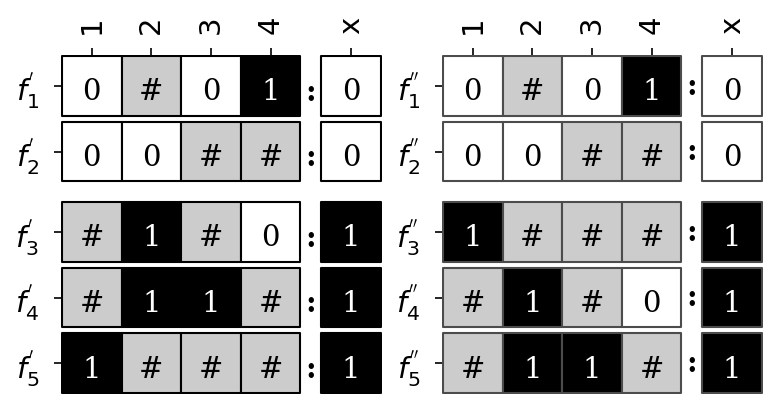

In [7]:
partial_luts = [
    [("00--", "0"), ("1--1", "1"), ("11--", "1")],
    [("1--", "1"), ("101", "0"), ("011", "0"), ("01-", "1")],
    [("0--0", "0"), ("1--1", "0"), ("0111", "1"), ("0011", "1")],
    [("1-01", "1"), ("1-1-", "0"), ("0110", "1"), ("01-1", "1")],
    
]
partial_lut = partial_luts[0]

"""
# Inner workings of the from_partial_lut() function under BooleanNode class

required_effective_connectivity = .7

generated_outputs = generated_node.outputs.copy()
missing_output_indices = [i for i, x in enumerate(generated_outputs) if x == '?']
print(f"Missing output indices = {missing_output_indices}.")

missing_output_count = generated_outputs.count('?')
print(f"No. of '?' in output = {missing_output_count}.")
permutations = list(product(*[('0', '1')] * (missing_output_count)))
print(permutations)  
generated_node_permutations = [None] * len(permutations)

for count, permutation in enumerate(permutations):
    for i, index in enumerate(missing_output_indices):
        generated_outputs[index] = permutation[i]
    generated_node_permutations[count] = BooleanNode.from_output_list(generated_outputs)

print(f"Total output permutations generated = {len(generated_node_permutations)}.")

permutation_effective_connectivity = [x.effective_connectivity() for x in generated_node_permutations]
print(permutation_effective_connectivity)
closest_value = min(permutation_effective_connectivity, key=lambda x: abs(x - required_effective_connectivity))
print(f"Closest value to required effective connectivity: {closest_value}")

closest_index = permutation_effective_connectivity.index(closest_value)
generated_node_permutations[closest_index].look_up_table()

"""

# Incorporating the above functions into the from_partial_lut() under BooleanNode class
generated_node = BooleanNode.from_partial_lut(partial_lut, required_effective_connectivity=0.45)

# plot_look_up_table(generated_node)
plot_schemata(generated_node)

## Note: 

from_partial_lut() will throw an error if there are mutliple kwargs inputted. 

```python
generated_node = BooleanNode.from_partial_lut(partial_lut, fill_missing_output_randomly= True, required_effective_connectivity=0.7, required_node_bias=0.5)

ValueError: Only one of required_effective_connectvity, required_node_bias and fill_missing_output_randomly can be True. Please set the rest to False.
```